In [1]:
import numpy as np
import astropy
import regions
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits 
from astropy import units as u 
from regions import read_ds9, write_ds9
from astropy.coordinates import SkyCoord
import glob, os
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
from astropy.coordinates import SkyOffsetFrame
from astropy import cosmology 
import math
from astropy.table import Table, Column, unique
from matplotlib import pyplot
import random
import scipy
from scipy import stats

In [2]:
#dfile = 'C://Users/Janel/Desktop/all_BCG_coords.fits'
#ftable = fits.open(dfile)
#data = Table(ftable[1].data)
#tfile = 'C://Users/Janel/Desktop/master_BCG_Cluster_Data.txt' 
tfile2 = 'C://Users/Janel/Desktop/master_BCG_Cluster_Data2.txt' #pulls master text file from directory 
#data = ascii.read(tfile,format = 'basic') # read that texr file into an ascii table 
data =ascii.read(tfile2,format = 'basic')  
ncl = len(unique(data, keys = 'Name'))



bcg_sz = data['BCG_Xp_AngDist'] #bcg-sz seperation 
bcg_peak = data['BCG_Xp_AngDist'] # bcg - xray peak separation 
bcg_xcen = data['BCG_Xc_AngDist'] #bcg - xray center separation 
sz_xcen = data['SZ_Xray_AngDist'] #sz - xcen separation 
spt_size = data['SPT_size'] #spt size 
spt_sn = data ['SPT_SN'] #spt - sn 
z_cls = data['Redshift'] #redshift of the galaxy clusters 
mass = data['m500']
masse = data['m500err']
beam = 0.0002*(180/math.pi)*3600 #beam value in radians (lamda/D -> radians (arcsec)) this is one value 

a = data['SZ_RA'] #here and below are indexed values within the table 
b = data['SZ_Dec']
c = data['Xcen_RA']
d = data['Xcen_Dec']
e = data['Xpeak_RA']
f = data['Xpeak_Dec']
g = data['BCG_RA']
h = data['BCG_Dec']

SZc = SkyCoord(a,b, unit = 'deg', frame ='fk5') #SZ center
XRc = SkyCoord(c,d, unit = 'deg', frame = 'fk5') #xray center
XRp = SkyCoord(e,f, unit = 'deg', frame ='fk5')#xray peak 
BCG = SkyCoord(g,h, unit = 'deg',frame = 'fk5')#bcg 

sep6 = SZc.separation(XRp) #SZ and XRAY Peak 
nsep6 = sep6.rad
asep6 = sep6.arcsec 


sep5 = SZc.separation(XRc)  #SZ and XRAY CENTER 
nsep5 = sep5.rad
asep5 = sep5.arcsec

sep7 = BCG.separation(XRp) #BCG and XRAY Peak
nsep7 = sep7.rad
asep7 = sep7.arcsec 



#tfile = 'C://Users/Janel/Desktop/all_BCG_coords.txt'
#bdata = ascii.read(tfile)


#bdata = Table(names=('Name', 'Redshift', 'Redshift_Err','N_Members','vd_biw','vd_err','SZ_RA','SZ_Dec','Xpeak_RA',
#'Xpeak_Dec','Xcen_RA','Xcen_Dec','BCG_RA','BCG_Dec','BCG_SZ_AngDist','BCG_Xp_AngDist','BCG_Xc_AngDist','SZ_Xray_AngDist','SZ_Xray_Arcsec')

cos = astropy.cosmology.FlatLambdaCDM(H0 = 70, Om0 = 0.3, Tcmb0 = 2.725) #defining cosmological values 

simu = [] #indexing simiuation values 
simuk = [] #simulation of 
random.seed()
for i in range(len(data)): #for the length of cdata
    szerr = math.sqrt(beam**2 + spt_size[i]**2 )/ spt_sn[i] #this is the expected error for the SZ cluster, it is delta theta in the equation
    #and sigma in application #
    rval = np.random.rand(1000) 
    x = np.sqrt(-2*np.log(rval)*szerr**2) #this is the simulated measurements. now i have to put this into an array 
    simu = np.append(simu,x)
    adj = cos.angular_diameter_distance(z_cls[i]).value 
    fac = (3600*(180/math.pi))
    xr = np.divide(x,fac)
    xmpc = np.multiply(xr,adj)
    xkpc = np.multiply(xmpc,1000)
    simuk = np.append(simuk,xkpc)
    
        
#print(np.median(simu))
#print(np.std(simu))        
#print(max(simu))
#print(min(simu))

simux = []
simux_k = []
#random.seed()
for i in range(len(data)): #for the length of cdata
    xerr = 1 #this is the expected error for the SZ cluster, it is delta theta in the equation
    #and sigma in application #
    rval1 = np.random.rand(1000)
    x = np.sqrt(-2*np.log(rval1)*xerr**2) #this is the simulated measurements. now i have to put this into an array 
    simux = np.append(simux,x)
  
    adj = cos.angular_diameter_distance(z_cls[i]).value 
    fac = (3600*(180/math.pi))
    xr = np.divide(x,fac)
    xmpc = np.multiply(xr,adj)
    xkpc = np.multiply(xmpc,1000)
    simux_k = np.append(simux_k,xkpc)
    

48.6370575
48.6370575
44.2451053089827
1.569358806
1.569358806
1.519130407885231


(0, 400)

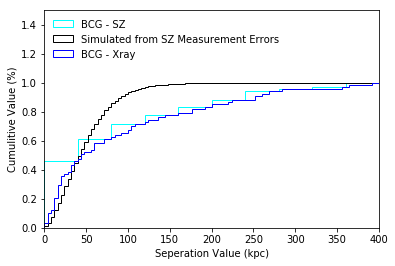

In [3]:
#BCG and SZ in kpc
sep = np.array(bcg_sz)
sep1 = np.array(bcg_peak)

prange = [0, 400]
bins = 10
 
# plotting a histogram (_hist)
#plt.hist(sep, bins, prange, color = 'purple', histtype = 'bar', rwidth = 1,density = True)

#plotting pdf histogram (_pdf)
#plt.hist(sep, bins, prange, color = 'purple', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
plt.hist(sep, bins, prange, color = 'cyan', histtype = 'step', rwidth = 2, cumulative = True, density = True, label = 'BCG - SZ')

print(np.median(sep))
print(np.median(sep1))
print(np.median(simuk))
print(np.percentile(sep1, .1, ))
print(np.percentile(sep, .1, ))
print(np.percentile(simuk, .1, ))
# x-axis label
plt.xlabel('Seperation Value (kpc)')
# frequency labe
plt.ylabel('Cumulitive Value (%)')
# plot title



prange = [0, 400]
bins = 100
#plt.hist(simuk, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)
plt.hist(simuk, bins, prange, color = 'black', histtype = 'step', rwidth = 2, cumulative = True, density = True, label = 'Simulated from SZ Measurement Errors')
plt.hist(sep1, bins, prange, color = 'blue', histtype = 'step', rwidth = 2, cumulative = True, density = True, label = 'BCG - Xray')

plt.legend(loc='upper left', frameon=False )
  
plt.ylim(0, 1.5)    
plt.xlim(0, 400)
   


#plt.savefig('C://Users/Janel/Desktop/MultiGraph2.png')  
     #   values = lines.split(',')
      #  print(values)

465.779648
1.569304


Text(0.5,1,'BCG and Xray Peak Offset')

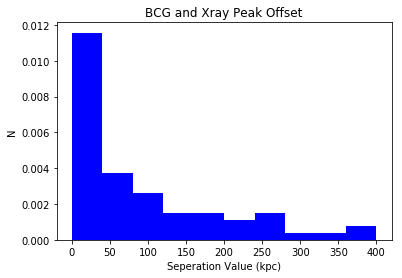

In [4]:
#BCG and XRAY PEAK in kpc 

sep1 = np.array(bcg_peak)

print(max(bcg_peak))
print(min(bcg_peak))
prange = [0, 400]
bins = 10
 
# plotting a histogram (_hist)
plt.hist(sep1, bins, prange, color = 'blue', histtype = 'bar', rwidth = 1, density = True)

#plotting pdf histogram (_pdf)
#plt.hist(sep1, bins, prange, color = 'blue', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(sep1, bins, prange, color = 'blue', histtype = 'bar', rwidth = 1, cumulative = True, density = True)


# x-axis label
plt.xlabel('Seperation Value (kpc)')
# frequency labe
plt.ylabel('N')
# plot title
plt.title('BCG and Xray Peak Offset')
#plt.show()
     #   values = lines.split(',')
      #  print(values)
        
#prange = [0, 20]
#bins = 100
#plt.hist(simux_k, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)


#plt.hist(simux_k, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)

#plt.savefig('C://Users/Janel/Desktop/BCG_Xrayp_Graph_kpc_hist.png')    

(array([1.98322244e-03, 5.71436975e-03, 8.62617728e-03, 1.06892328e-02,
        1.29791825e-02, 1.36304525e-02, 1.34875933e-02, 1.40086094e-02,
        1.35380142e-02, 1.36934787e-02, 1.33111201e-02, 1.30169981e-02,
        1.23699298e-02, 1.19833695e-02, 1.12942837e-02, 1.13320994e-02,
        1.02606551e-02, 9.78165645e-03, 9.09257069e-03, 8.20180129e-03,
        7.40347022e-03, 6.73119143e-03, 6.08832483e-03, 5.55890528e-03,
        4.83200383e-03, 4.45384701e-03, 3.89921701e-03, 3.49584973e-03,
        3.25635041e-03, 2.68071169e-03, 2.44961586e-03, 2.06725729e-03,
        1.76473183e-03, 1.68910047e-03, 1.27312797e-03, 1.15547918e-03,
        1.13026872e-03, 9.53795539e-04, 7.81524098e-04, 5.42024778e-04,
        6.68077052e-04, 4.83200383e-04, 3.94963791e-04, 3.48744624e-04,
        2.05885381e-04, 3.19332427e-04, 2.94121972e-04, 2.10087123e-04,
        1.97481896e-04, 1.42859244e-04, 1.51262729e-04, 1.38657501e-04,
        1.00841819e-04, 9.66400766e-05, 9.66400766e-05, 9.664007

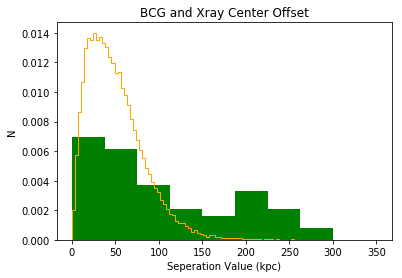

In [7]:
#BCG and XRAY CENTER in kpc
sep2 = np.array(bcg_xcen)


prange = [0, 300]
bins = 8
 
# plotting a histogram
#plt.hist(sep2, bins, prange, color = 'green', histtype = 'bar', rwidth = 1)

#plotting pdf histogram (_pdf)
plt.hist(sep2, bins, prange, color = 'green', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(sep2, bins, prange, color = 'green', histtype = 'bar', rwidth = 1, cumulative = True, density = True)

# x-axis label
plt.xlabel('Seperation Value (kpc)')
# frequency labe
plt.ylabel('N')
# plot title
plt.title('BCG and Xray Center Offset')

        
prange = [0, 350]
bins = 100
plt.hist(simuk, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)
  
#plt.savefig('C://Users/Janel/Desktop/BCG_Xcen_graph_kpc_hist.png')    

(array([1.98322244e-03, 5.71436975e-03, 8.62617728e-03, 1.06892328e-02,
        1.29791825e-02, 1.36304525e-02, 1.34875933e-02, 1.40086094e-02,
        1.35380142e-02, 1.36934787e-02, 1.33111201e-02, 1.30169981e-02,
        1.23699298e-02, 1.19833695e-02, 1.12942837e-02, 1.13320994e-02,
        1.02606551e-02, 9.78165645e-03, 9.09257069e-03, 8.20180129e-03,
        7.40347022e-03, 6.73119143e-03, 6.08832483e-03, 5.55890528e-03,
        4.83200383e-03, 4.45384701e-03, 3.89921701e-03, 3.49584973e-03,
        3.25635041e-03, 2.68071169e-03, 2.44961586e-03, 2.06725729e-03,
        1.76473183e-03, 1.68910047e-03, 1.27312797e-03, 1.15547918e-03,
        1.13026872e-03, 9.53795539e-04, 7.81524098e-04, 5.42024778e-04,
        6.68077052e-04, 4.83200383e-04, 3.94963791e-04, 3.48744624e-04,
        2.05885381e-04, 3.19332427e-04, 2.94121972e-04, 2.10087123e-04,
        1.97481896e-04, 1.42859244e-04, 1.51262729e-04, 1.38657501e-04,
        1.00841819e-04, 9.66400766e-05, 9.66400766e-05, 9.664007

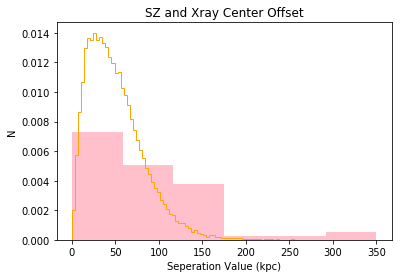

In [8]:
#SZ and Xray center seperation in kpc 
sep3 = np.array(sz_xcen)

prange = [0, 350]
bins = 6
 
# plotting a histogram (_hist)
#plt.hist(sep3, bins, prange, color = 'pink', histtype = 'bar', rwidth = 1)

#plotting pdf histogram (_pdf)
plt.hist(sep3, bins, prange, color = 'pink', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(sep3, bins, prange, color = 'pink', histtype = 'bar', rwidth = 1, cumulative = True, density = True) 

# x-axis label
plt.xlabel('Seperation Value (kpc)')
# frequency labe
plt.ylabel('N')
# plot title
plt.title('SZ and Xray Center Offset')
     
prange = [0, 350]
bins = 100
plt.hist(simuk, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True) 

#plt.hist(simux, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)
#plt.savefig('C://Users/Janel/Desktop/SZ_Xcen_Graph_kpc_hist.png')    

(array([1.01636976e-02, 3.09813034e-02, 4.70275270e-02, 5.89559824e-02,
        7.29433219e-02, 8.46756931e-02, 8.46103317e-02, 8.81071666e-02,
        8.88915033e-02, 8.74535526e-02, 9.07543032e-02, 8.89895454e-02,
        8.69306614e-02, 8.66365351e-02, 8.16690687e-02, 8.16037073e-02,
        7.80415110e-02, 7.80088303e-02, 7.51656094e-02, 7.12439255e-02,
        6.49038697e-02, 6.44790206e-02, 5.71585439e-02, 5.34656248e-02,
        4.87269233e-02, 4.73216533e-02, 4.29424395e-02, 3.86285871e-02,
        3.55239206e-02, 3.21251279e-02, 2.92492263e-02, 2.66347703e-02,
        2.32686582e-02, 2.13404969e-02, 1.94776971e-02, 1.66671569e-02,
        1.64383920e-02, 1.29088764e-02, 1.16016484e-02, 1.16343291e-02,
        9.57544503e-03, 7.45119955e-03, 8.39893984e-03, 6.01324876e-03,
        5.32695406e-03, 4.73870147e-03, 3.20270858e-03, 3.52951557e-03,
        3.49683487e-03, 2.77785948e-03, 3.13734718e-03, 1.99352269e-03,
        2.02620339e-03, 1.50331219e-03, 1.50331219e-03, 1.535992

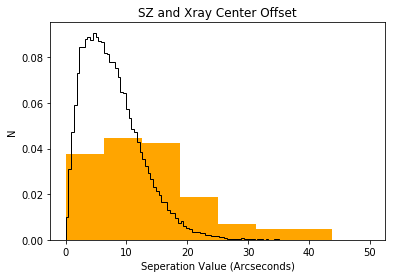

In [9]:
#SZ and Xray Center in arcseconds 
prange = [0, 50]
bins = 8

#plotting a histogram (_hist)
#plt.hist(asep5, bins, prange, color = 'orange', histtype = 'bar', rwidth = 1)
 
#plotting pdf histogram (_pdf)
plt.hist(asep5, bins, prange, color = 'orange', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(asep5, bins, prange, color = 'Orange', histtype = 'bar', rwidth = 1, cumulative = True)    
    
    
# x-axis label
plt.xlabel('Seperation Value (Arcseconds)')
# frequency labe
plt.ylabel('N')
# plot title
plt.title('SZ and Xray Center Offset')



prange = [0, 45]
bins = 100
plt.hist(simu, bins, prange, color = 'black', histtype = 'step', rwidth = 1, density = True)
#plt.hist(simux_k, bins, prange, color = 'blue', histtype = 'step', rwidth = 1, density = True)

#plt.savefig('C://Users/Janel/Desktop/SZ_X_Arc_Graph_arc_hist.png')        

(array([1.3000e-02, 3.9500e-02, 5.6450e-02, 7.4225e-02, 8.4125e-02,
        8.7275e-02, 8.8050e-02, 8.9025e-02, 8.9275e-02, 8.8050e-02,
        8.5700e-02, 8.1300e-02, 7.8600e-02, 7.7800e-02, 7.1700e-02,
        6.8025e-02, 6.3625e-02, 5.5675e-02, 4.9300e-02, 4.8050e-02,
        4.2000e-02, 3.5875e-02, 3.3100e-02, 2.8775e-02, 2.4300e-02,
        2.1675e-02, 1.9000e-02, 1.6950e-02, 1.3550e-02, 1.1625e-02,
        1.1200e-02, 8.0000e-03, 7.9250e-03, 5.4750e-03, 5.4750e-03,
        3.3250e-03, 3.3750e-03, 3.3250e-03, 3.0750e-03, 2.1000e-03,
        1.6500e-03, 1.5000e-03, 1.5000e-03, 1.1250e-03, 9.5000e-04,
        5.2500e-04, 5.0000e-04, 3.7500e-04, 4.2500e-04, 6.0000e-04,
        1.5000e-04, 2.2500e-04, 2.2500e-04, 1.0000e-04, 2.2500e-04,
        7.5000e-05, 1.7500e-04, 1.0000e-04, 2.2500e-04, 1.2500e-04,
        5.0000e-05, 2.5000e-05, 5.0000e-05, 2.5000e-05, 5.0000e-05,
        2.5000e-05, 2.5000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e-05, 0.0000e+00, 0.0000e+00, 0.00

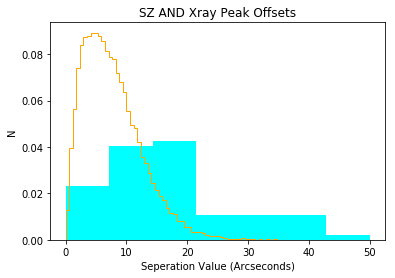

In [10]:
#SZ and Xray Peak seperation in arcseconds 
prange = [0, 50]
bins = 7

#plotting a histogram (_hist)
#plt.hist(asep6, bins, prange, color = 'cyan', histtype = 'bar', rwidth = 1)

#plotting pdf histogram (_pdf)
plt.hist(asep6, bins, prange, color = 'cyan', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(asep6, bins, prange, color = 'cyan', histtype = 'bar', rwidth = 1, cumulative = True, density = True)


# x-axis label
plt.xlabel('Seperation Value (Arcseconds)')
# frequency labe
plt.ylabel('N')
# plot title
plt.title('SZ AND Xray Peak Offsets')



prange = [0, 50]
bins = 85
plt.hist(simu, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, density = True)
 
#plt.savefig('C://Users/Janel/Desktop/SZ_Xp_Arc_Graph_arc_hist.png') 

74.11381560309638
0.21938147531744048


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 1 Patch objects>)

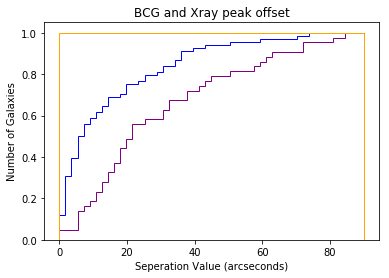

In [11]:
sep1 = np.array(bcg_peak)

print(max(asep7))
print(min(asep7))
prange = [0, 90]
bins = 50
 
# plotting a histogram (_hist)

plt.hist(asep7, bins, prange, color = 'blue', histtype = 'step', rwidth = 1, cumulative = True, density = True)
plt.hist(sep, bins, prange, color = 'purple', histtype = 'step', rwidth = 1, cumulative = True, density = True)
#plotting pdf histogram (_pdf)
#plt.hist(sep1, bins, prange, color = 'blue', histtype = 'bar', rwidth = 1, density = True)

#plotting the cumulative distribution (_cdf)
#plt.hist(sep1, bins, prange, color = 'blue', histtype = 'bar', rwidth = 1, cumulative = True, density = True)


# x-axis label
plt.xlabel('Seperation Value (arcseconds)')
# frequency labe
plt.ylabel('Number of Galaxies')
# plot title
plt.title('BCG and Xray peak offset')



bins = 10
plt.hist(simux, bins, prange, color = 'orange', histtype = 'step', rwidth = 1, cumulative = True, density = True)

#plt.savefig('C://Users/Janel/Desktop/BCG_Xrayp_Graph_arc_hist.png')  

0.6058352941176472


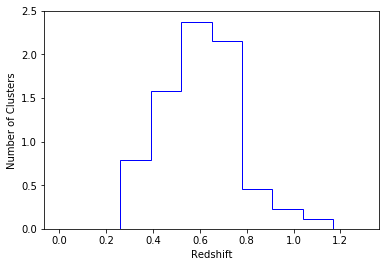

<Figure size 432x288 with 0 Axes>

In [14]:
prange = [0, 1.3]
bins = 10

# plotting a histogram (_hist)
plt.hist(z_cls, bins, prange, color = 'blue', histtype = 'step', rwidth = 1, density = True)


# x-axis label
plt.xlabel('Redshift')
# frequency labe
plt.ylabel('Number of Clusters')
# plot title
print(np.average(z_cls))
plt.show()


mass = data['m500']
masse = data['m500err']


#plt.scatter(z_cls,mass,color='G')
#plt.scatter(x,y, z_cls, color = 'b')
#plt.errorbar(z_cls, mass, yerr=masse, fmt = 'bo')
#plt.xlabel('Redshift')
#plt.ylabel('Mass')


plt.savefig('C://Users/Janel/Desktop/Redshift_1.png')
#plt.show()
     #   values = lines.split(',')
      #  print(values)

 m500
-----
 4.56
 7.08
 5.31
 5.31
 4.72
 3.91
10.24
 4.49
 6.23
 4.46
  ...
  5.6
 6.17
 6.17
  2.7
  2.7
 5.59
 3.93
12.05
12.05
  3.6
  3.6
Length = 68 rows


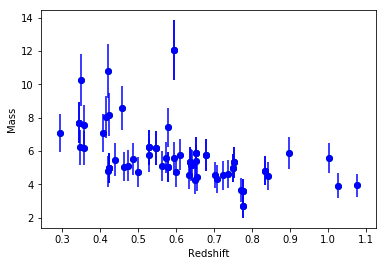

In [12]:
mass = data['m500']
masse = data['m500err']

print(mass)
plt.scatter(z_cls,mass,color='G')
#plt.scatter(x,y, z_cls, color = 'b')
plt.errorbar(z_cls, mass, yerr=masse, fmt = 'bo')
plt.xlabel('Redshift')
plt.ylabel('Mass')

plt.savefig('C://Users/Janel/Desktop/Mass1_Graph.png')
#spt is well defined in mass, high mass very rare 

In [13]:
# old code:
# with open('C:\\Users\Janel\Desktop\BCG-Xray_peak_separation.txt') as f: #opens seperations file 
#    sep = f.readlines() #reads into seperations file
#    sep1 = np.array(sep)


#put titles on the graphs *****
#SZ is large so 
#purple in arcsec 
#correlations between orange and purple graph signify what the uncertainty
#account for the noise of the SZ which is accounting for the 
#may want to make a cumuitive distribution for seperatoins (like in paper) and a theoretical plot like in the paper*****
#page 18 - reread section of the paper on figures 
#most noises are gaussian 
#delta theta is sigma for our curve 
#delta theta will often be 20 arcsec 
#need to take the integral to find the probability (true probability)
#probability density functions: divide by the total number of clusters then you get the fraction of cluster in each bin *****

#new versions of graphs that are probability 

In [14]:
#make plots of the mass, mass error, and make legends, decide on how to handle ones with 2 bcgs vs redshift (do this first)

#for 2 bcgs: 1). choose one thing, 2) average the positions(the coordinates) 3) average the seperations(average the offsetts) <-- talk to mike
#the avg offset will be smaller
#average the coordinates, and then average the seperation values 
#make new version of the plots based off of those 
#15 clusters have 2 BCGs 